In [1]:
#Cuantificación de imágenes con k-means
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from PIL import Image
#%matplotlib widget
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H', 'x', '+', '<', '>', '1', '2', '3', '4']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

def simple3DPlot(df, features):
    fields = df[features].columns
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    i = 0
    ax.scatter(df[fields[0]], df[fields[1]], df[fields[2]], marker='o', color='b')

    ax.set_xlabel(fields[0])
    ax.set_ylabel(fields[1])
    ax.set_zlabel(fields[2])
    plt.show()
     

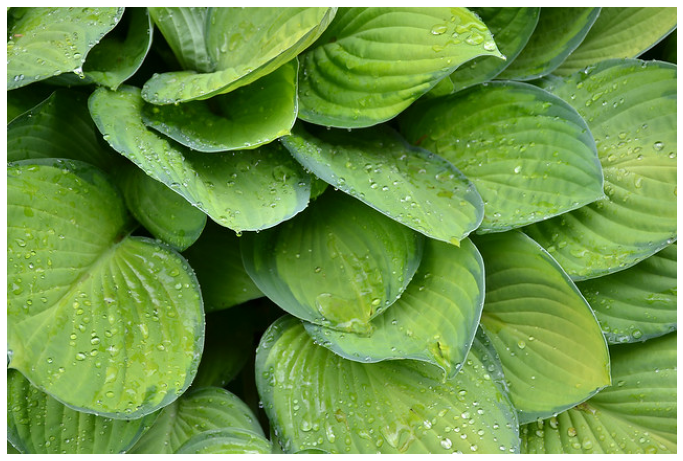

In [2]:
I = Image.open("./GreenImage.jpg")
I1 = np.asarray(I,dtype=np.float32)/255
plt.figure(figsize=(12,12))
plt.imshow(I1)
plt.axis('off')
plt.show()


In [3]:

w, h = I.size
#lista de todos los colores
colors = I.getcolors(w * h)
num_colores = len(colors) 
num_pixels = w*h 

print (u'Número de pixels  = ', num_pixels)
print (u'Número de colores = ', num_colores)


Número de pixels  =  273280
Número de colores =  75823


In [4]:
R = I1[:,:,0]
G = I1[:,:,1]
B = I1[:,:,2]
XR = R.reshape((-1, 1))  
XG = G.reshape((-1, 1)) 
XB = B.reshape((-1, 1)) 

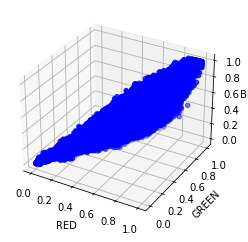

In [5]:
pre_data_frame = np.concatenate((XR,XG,XB),axis=1)
column_names = ['RED', 'GREEN', 'BLUE']
#Para estandarizar mas el procesamiento creamos un DataFrame
df = pd.DataFrame(pre_data_frame, columns=column_names)
simple3DPlot(df, column_names)


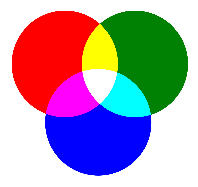

In [6]:
k_means = KMeans(n_clusters=30)
k_means.fit(df)

centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

m = XR.shape
for i in range(m[0]):
    XR[i] = centroides[etiquetas[i]][0] 
    XG[i] = centroides[etiquetas[i]][1] 
    XB[i] = centroides[etiquetas[i]][2] 


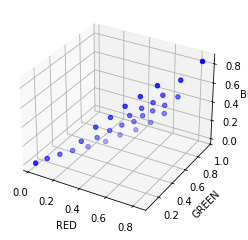

In [7]:
#Antes de volver a formar la imagen, dibujo los centroides resultantes, observar como se encuentran en un sector del espacio
pre_data_frame = np.concatenate((XR,XG,XB),axis=1)
df = pd.DataFrame(pre_data_frame, columns=column_names)
dfd = df.drop_duplicates()
simple3DPlot(dfd, column_names)

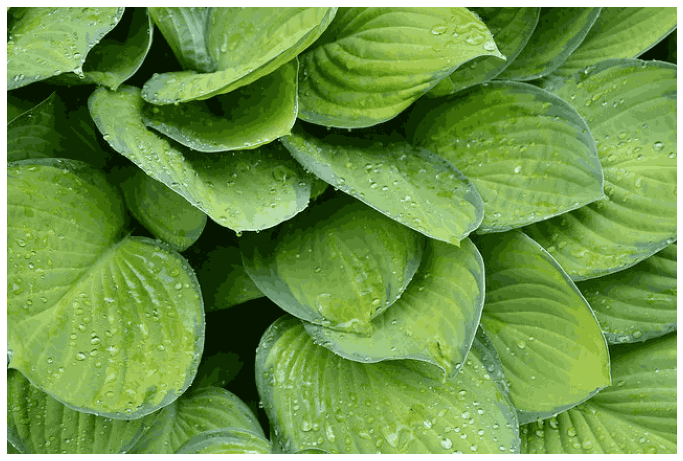

Número de pixels  =  273280
Número de colores =  30


In [8]:
#Vuelvo a construir la imagen
XR.shape = R.shape 
XG.shape = G.shape
XB.shape = B.shape 
XR = XR[:, :, np.newaxis]  
XG = XG[:, :, np.newaxis]
XB = XB[:, :, np.newaxis]
Y = np.concatenate((XR,XG,XB),axis=2)

plt.figure(figsize=(12,12))
plt.imshow(Y)
plt.axis('off')
plt.show()

print (u'Número de pixels  = ', num_pixels)
print (u'Número de colores = ', 30)

In [9]:
type(Y)

numpy.ndarray

In [10]:
import matplotlib.image

matplotlib.image.imsave('name.jpg', Y)